## Exercise for plotting_quasar_observations.ipynb
### Recognizing Familiar Emission Lines

Look at the spectrum we plotted, does anything stand out to you?

In astronomy, spectral features at specific wavelengths are indicative of known elements. For example, an emission line at 1216 Angstroms is called Lyman Alpha. It is produced when an orbital electron of a hydrogen atom drops from the first excited state down to the ground state, emitting a photon.

Does 3c273 have a Lyman Alpha emission line? Plot a vertical line at 1216 Angstroms to find out.

### Solution:

This question is a bit disingenuous. We can add two lines to plot a vertical line at the Lyman Alpha line, and we'll actually find quite a nice fit for our data.

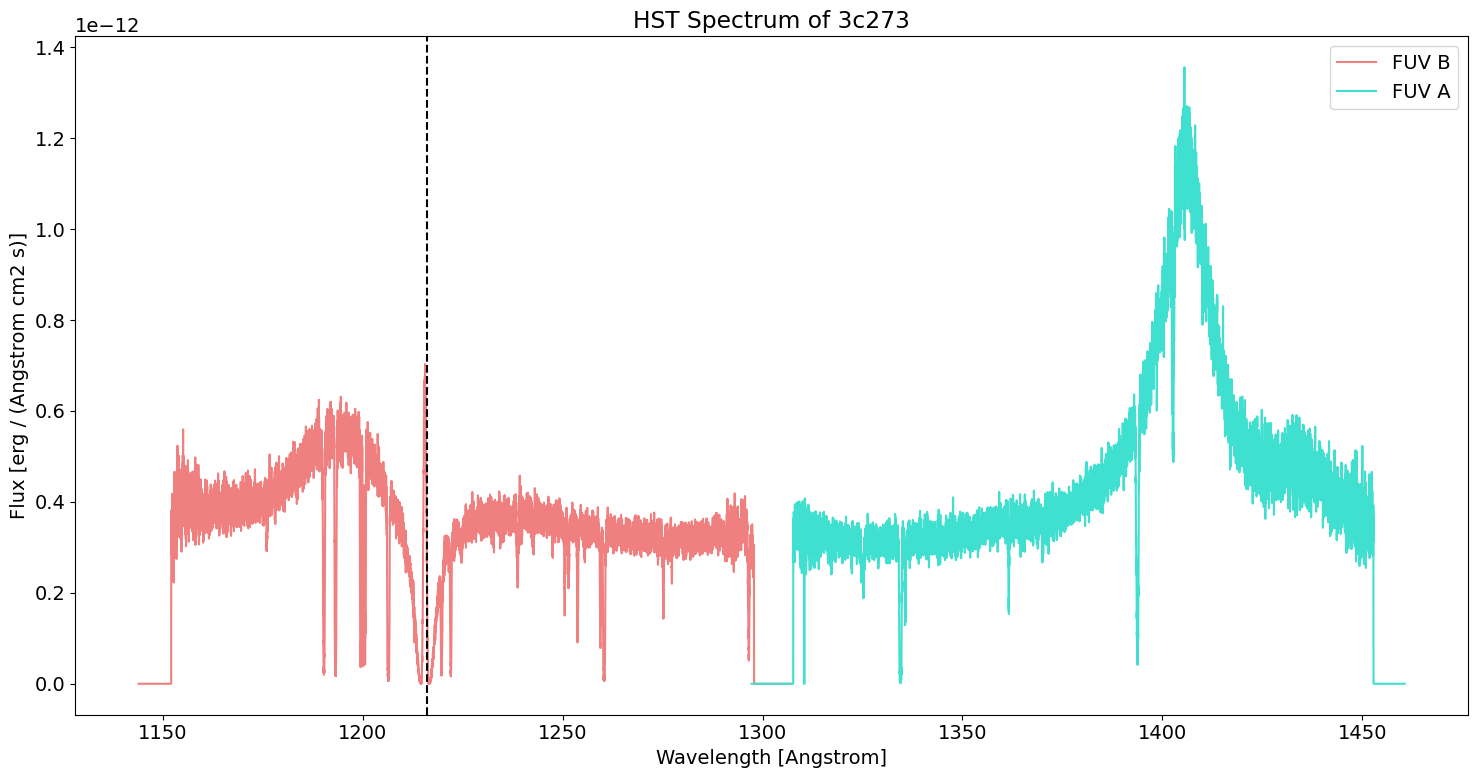

In [6]:
#Answer to Exercise. SPECTRUM PLOTTING CELL COPIED HERE, SOLUTION LINES AT THE BOTTOM

from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

tab = Table.read("mastDownload/HST/lbgl31030/lbgl31030_x1dsum.fits")

#Make the figure and set the font size globally
plt.rcParams.update({"font.size": 14})
plt.figure(1,(15,8))

#Gather the arrays from our data table
waves = tab['WAVELENGTH']
fluxes = tab["FLUX"]
segment = tab['SEGMENT']

#You'll notice from our data table that there are two segments to this observation, FUV A and FUV B
#Let's parse the spectra by their segment and plot them separately
ind_A = np.squeeze(np.where(fluxes != 0) and np.where(segment == 'FUVA'))
waves_A = waves[ind_A]
fluxes_A = fluxes[ind_A]
ind_B = np.squeeze(np.where(fluxes != 0) and np.where(segment == 'FUVB'))
waves_B = waves[ind_B]
fluxes_B = fluxes[ind_B]

#Plot both segments
plt.plot(waves_B, fluxes_B, label = "FUV B", color = 'lightcoral')
plt.plot(waves_A, fluxes_A, label = "FUV A", color = 'turquoise')

#Set the x and y axes labels and the title
plt.xlabel('Wavelength [{}]'.format(tab['WAVELENGTH'].unit))
plt.ylabel('Flux [{}]'.format(tab['FLUX'].unit))
plt.title("HST Spectrum of 3c273")

#plot the legend
plt.legend()

#give the figure a tight layout (optional)
plt.tight_layout()

#SOLUTION HERE
xval = 1216 #Lyman Alpha in Angstroms
plt.axvline(xval, color = "black", linestyle = "--")

**However**, our target is an extragalactic quasar, so we should expect some redshifting. Indeed, the peak we've found here isn't from the quasar at all! It's contamination from a source along our line-of-sight.

The "true" Lyman Alpha emission is actually the enormous, broadened peak in FUV A. As an advanced exercise for the reader, you might try fitting a normal distribution to that peak, determining the center of the wavelength, then calculating the redshift using $$z = \frac{\lambda_{obs}-\lambda_{actual}}{\lambda_{actual}}$$